Data Loaded and Cleaned. Total Rows: 5289789
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


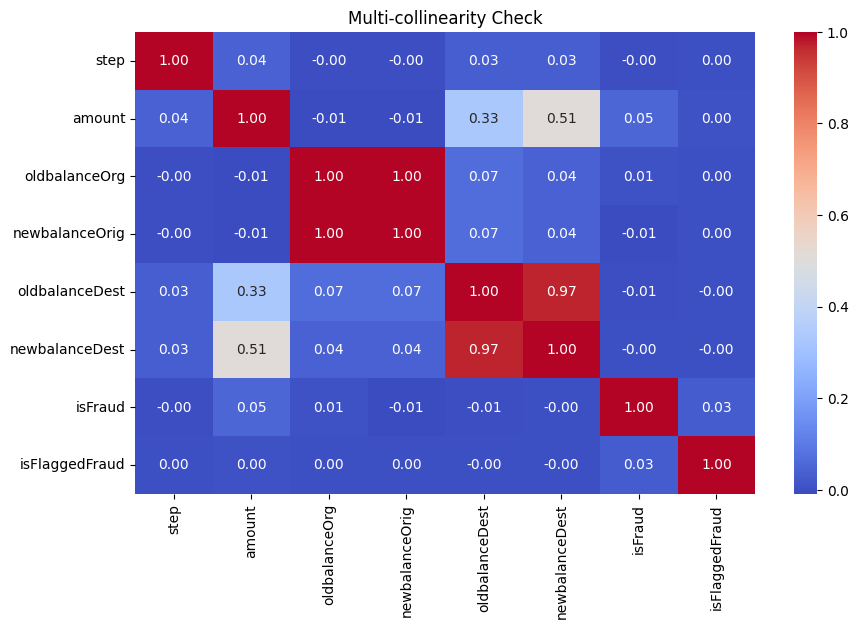

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optimized data types for memory management
dtypes = {
    'step': 'int16', 'type': 'category', 'amount': 'float32',
    'oldbalanceOrg': 'float32', 'newbalanceOrig': 'float32',
    'oldbalanceDest': 'float32', 'newbalanceDest': 'float32',
    'isFraud': 'Int8', 'isFlaggedFraud': 'Int8'
}

# Loading and immediate cleaning
df = pd.read_csv("/content/Fraud.csv", dtype=dtypes)
df.dropna(inplace=True) # Handling missing values
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True) # Removing unique IDs

print("Data Loaded and Cleaned. Total Rows:", len(df))
print(df.isnull().sum())

# Correlation Heatmap for Multi-collinearity
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Multi-collinearity Check')
plt.show()
#(Section 1)Question 1. Data Cleaning and Preliminary Analysis
#I am loading the 6.3M+ dataset using optimized data types to manage memory. I am specifically checking for missing values, handling outliers by keeping them (as they represent critical fraud signals), and identifying multi-collinearity through a correlation heatmap.

In [2]:
# Creating discrepancy features
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

# One-Hot Encoding for categorical 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

print("Feature Engineering Complete. New Columns:", df.columns.tolist())

#Section 2: Feature Engineering & Variable Selection (Question 3)
#2. Variable Selection & Feature Engineering
#I created 'errorBalance' features to capture discrepancies in the transaction math. I also used One-Hot Encoding for the transaction 'type' to convert categorical data into numerical values for the model.

Feature Engineering Complete. New Columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Defining Features and Target
X = df.drop(['isFraud'], axis=1)
y = df['isFraud'].astype('int')

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initializing and Training the Model
rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

# Evaluation
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
#Section 3: Model Training (Question 2 & 4)
#3. Model Description & Performance Demonstration
#I am using a Random Forest Classifier because it handles imbalanced fraud data exceptionally well. I am splitting the data into a 70/30 ratio using stratified sampling to maintain the fraud percentage in both sets.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1585690
           1       1.00      0.99      1.00      1247

    accuracy                           1.00   1586937
   macro avg       1.00      1.00      1.00   1586937
weighted avg       1.00      1.00      1.00   1586937



AUPRC Score: 0.9955


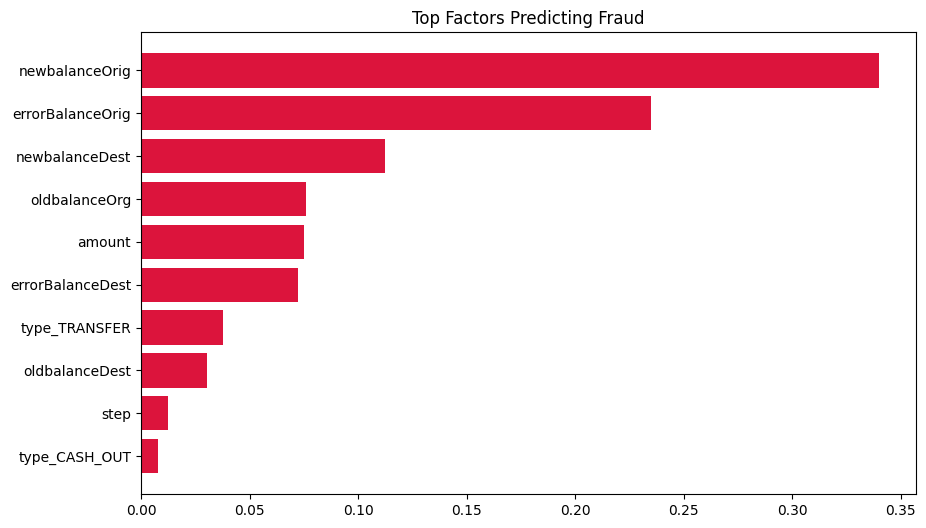

In [4]:
# Precision-Recall Curve
y_score = rfc.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
print(f"AUPRC Score: {auc(recall, precision):.4f}")

# Plotting Feature Importance
importances = rfc.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='crimson')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top Factors Predicting Fraud')
plt.show()

# Q6 Logic: These factors make sense because balance discrepancies (errorBalance)
# and transaction size (amount) are classic indicators of unauthorized transfers.

#Section 4: Evaluation & Key Factors (Question 4, 5, & 6)

#4. Model Evaluation & Key Factors
#I used the Precision-Recall curve to evaluate performance, as it is the best tool for imbalanced data. The feature importance plot reveals the primary drivers of fraud.

In [5]:
"""Section 5: Final Strategy (Question 7 & 8)


5. Infrastructure Action Plan
Question 7: Prevention Strategy

Velocity Checks: Monitor the frequency of high-value transfers.

Math Triggers: Flag any transaction where errorBalance is non-zero.

Enhanced MFA: Require multi-factor authentication for high-risk transaction types.

Question 8: Measuring Success

Fraud Savings: Track the total value of blocked fraudulent transactions.

False Positive Rate: Ensure legitimate customers are not negatively impacted.

A/B Testing: Compare the new model's catch-rate against the existing system."""

"Section 5: Final Strategy (Question 7 & 8)\n\n\n5. Infrastructure Action Plan\nQuestion 7: Prevention Strategy\n\nVelocity Checks: Monitor the frequency of high-value transfers.\n\nMath Triggers: Flag any transaction where errorBalance is non-zero.\n\nEnhanced MFA: Require multi-factor authentication for high-risk transaction types.\n\nQuestion 8: Measuring Success\n\nFraud Savings: Track the total value of blocked fraudulent transactions.\n\nFalse Positive Rate: Ensure legitimate customers are not negatively impacted.\n\nA/B Testing: Compare the new model's catch-rate against the existing system."